In [1]:
# make sure you're logged in with \`huggingface-cli login\`
from diffusers import StableDiffusionParticlePipeline, StableDiffusionPipeline, LMSDiscreteScheduler, DDIMScheduler, DDPMScheduler, SDEScheduler, EulerDiscreteScheduler
import torch
import argparse
import os
from torchvision.utils import make_grid, save_image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

c:\Users\Yueze\anaconda3\envs\particle\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load SD-1.5

In [2]:
torch.cuda.empty_cache()

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

pipe = StableDiffusionParticlePipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
print(type(pipe))
pipe = pipe.to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

safety_checker\model.safetensors not found
c:\Users\Yueze\anaconda3\envs\particle\lib\site-packages\transformers\modeling_utils.py:429: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Loading pipeline class <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_particle.StableDiffusionParticlePipeline'> from C:\Users\Yueze\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5\snapshots\1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9
config_dict {'_class_name': 'StableDiffusionPipeline', '_diffusers_version': '0.6.0', 'feature_extractor': ['transformers', 'CLIPImageProcessor'], 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker'], 'scheduler': ['diffusers', 'PNDMScheduler'], 'text_encoder': ['transformers', 'CLIPTextModel'], 'tokenizer': ['transformers', 'CLIPTokenizer'], 'unet': ['diffusers', 'UNet2DConditionModel'], 'vae': ['diffusers', 'AutoencoderKL']}
<class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_particle.StableDiffusionParticlePipeline'>


# Define the prompt

In [ ]:
# prompt = ['VAN GOGH CAFE TERASSE copy.jpg']

In [4]:
prompt = ['a mug']

In [ ]:
seed = 6
num_of_image = 4
prompt = prompt * num_of_image
# number of sampling steps
steps = 30
# guidance scale
w = 8 


# Vanilla (i.i.d. sampling)

In [ ]:
# generator = torch.Generator(device="cuda").manual_seed(seed)

# out = pipe(prompt, generator=generator, num_inference_steps=steps, guidance_scale=w, output_type='tensor')
# image = out.images
# image_grid = make_grid(torch.from_numpy(image).permute(0, 3, 1, 2), nrow=int(np.sqrt(len(image))))
# plt.imshow(image_grid.permute(1, 2, 0))

# del out
# torch.cuda.empty_cache()

# Particle Guidance (pixel)

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(seed)
# coefficient for the particle guidance scale
coeff = 30
out = pipe(prompt, generator=generator, num_inference_steps=steps, coeff=coeff, guidance_scale=w, output_type='tensor')
image = out.images
image_grid = make_grid(torch.from_numpy(image).permute(0, 3, 1, 2), nrow=int(np.sqrt(len(image))))
plt.imshow(image_grid.permute(1, 2, 0))

del out
torch.cuda.empty_cache()

In [ ]:
stop

In [5]:
seed = 6
num_of_image = 4
prompt = prompt * num_of_image
# number of sampling steps
steps = 20
# guidance scale
w = 8 
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
generator = torch.Generator(device="cuda").manual_seed(seed)
# coefficient for the particle guidance scale
out = pipe(prompt, generator=generator, num_inference_steps=steps, guidance_scale=w, output_type='tensor')
# image = out[0]
# image_grid = make_grid(torch.from_numpy(image).permute(0, 3, 1, 2), nrow=int(np.sqrt(len(image))))
# plt.imshow(image_grid.permute(1, 2, 0))

# del out
# torch.cuda.empty_cache()

safety_checker\model.safetensors not found


Loading pipeline class <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> from C:\Users\Yueze\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5\snapshots\1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9
config_dict {'_class_name': 'StableDiffusionPipeline', '_diffusers_version': '0.6.0', 'feature_extractor': ['transformers', 'CLIPImageProcessor'], 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker'], 'scheduler': ['diffusers', 'PNDMScheduler'], 'text_encoder': ['transformers', 'CLIPTextModel'], 'tokenizer': ['transformers', 'CLIPTokenizer'], 'unet': ['diffusers', 'UNet2DConditionModel'], 'vae': ['diffusers', 'AutoencoderKL']}


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
d:\particle-guidance-main\stable_diffusion\diffusers\models\attention_processor.py:641: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  hidden_states = F.scaled_dot_product_attention(


0
1
2
3
4
5
6
7
8
9
10
11


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10 pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)                           │
│   11 generator = torch.Generator(device="cuda").manual_seed(seed)                                │
│   12 # coefficient for the particle guidance scale                                               │
│ ❱ 13 out = pipe(prompt, generator=generator, num_inference_steps=steps, guidance_scale=w, out    │
│   14 # image = out[0]                                                                            │
│   15 # image_grid = make_grid(torch.from_numpy(image).permute(0, 3, 1, 2), nrow=int(np.sqrt(l    │
│   16 # plt.imshow(image_grid.permute(1, 2, 0))                                                   │
│                                                                                                  │
│ c:\Users\Yueze\anaconda3\envs\particle\lib\site-packages\torch\utils\_contextlib.py:116 in       │
│ decorate_context                                                                                 │
│                                                                                                  │
│   113 │   @functools.wraps(func)                                                                 │
│   114 │   def decorate_context(*args, **kwargs):                                                 │
│   115 │   │   with ctx_factory():                                                                │
│ ❱ 116 │   │   │   return func(*args, **kwargs)                                                   │
│   117 │                                                                                          │
│   118 │   return decorate_context                                                                │
│   119                                                                                            │
│                                                                                                  │
│ d:\particle-guidance-main\stable_diffusion\diffusers\pipelines\stable_diffusion\pipeline_stable_ │
│ diffusion.py:721 in __call__                                                                     │
│                                                                                                  │
│   718 │   │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_input   │
│   719 │   │   │   │                                                                              │
│   720 │   │   │   │   # predict the noise residual                                               │
│ ❱ 721 │   │   │   │   noise_pred = self.unet(                                                    │
│   722 │   │   │   │   │   latent_model_input,                                                    │
│   723 │   │   │   │   │   t,                                                                     │
│   724 │   │   │   │   │   encoder_hidden_states=prompt_embeds,                                   │
│                                                                                                  │
│ c:\Users\Yueze\anaconda3\envs\particle\lib\site-packages\torch\nn\modules\module.py:1553 in      │
│ _wrapped_call_impl                                                                               │
│                                                                                                  │
│   1550 │   │   if self._compiled_call_impl is not None:                                          │
│   1551 │   │   │   return self._compiled_call_impl(*args, **kwargs)  # type: ignore[misc]        │
│   1552 │   │   else:                                                                             │
│ ❱ 1553 │   │   │   return self._call_impl(*args, **kwargs) 

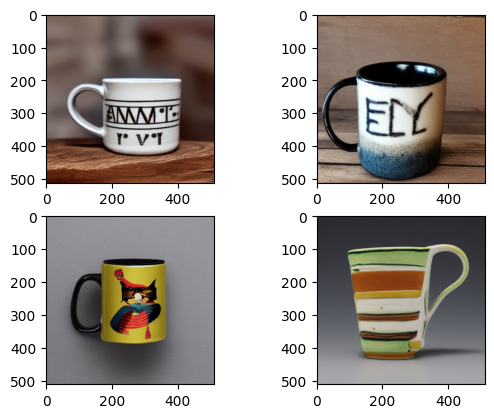

In [ ]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(out[0].images[0])
axes[0, 1].imshow(out[0].images[1])
axes[1, 0].imshow(out[0].images[2])
axes[1, 1].imshow(out[0].images[3])

# Particle Guidance (dino feature space)

In [ ]:
# load dino 
dino = torch.hub.load('facebookresearch/dino:main', 'dino_vits16').to("cuda")

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(seed)
# coefficient for the particle guidance scale
coeff = 8
out = pipe.dino(prompt, generator=generator, num_inference_steps=steps, coeff=coeff, guidance_scale=w, dino=dino, output_type='tensor')
image = out.images
image_grid = make_grid(torch.from_numpy(image).permute(0, 3, 1, 2), nrow=int(np.sqrt(len(image))))
plt.imshow(image_grid.permute(1, 2, 0))

del out
torch.cuda.empty_cache()